# Introduction

We'll try to get a simple intuition over the Central Limit Theorem.

Central Limit Theorem states that the sum of independant and identically distributed random variables will tend to be normally distributed as the number of members in the sum goes up. To understand this phrase it's better to experiment it ! That's what we'll do below.

# Imports

In [54]:
import numpy as np # Contains the random methods we will need

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.set_style({'patch.force_edgecolor': False})

# Some helpers functions

In [55]:
def print_distribution(custom_sampling_method, N=10000):
    samples = [custom_sampling_method() for i in range(N)]
    
    print("Mean: %s" % np.mean(samples))
    print("Standard Deviation: %s" % np.std(samples))
    print("A look at the distribution")
    plt.hist(samples, bins=100)

# Construct a custom distribution

Mean: 24.62636581659578
Standard Deviation: 17.255295802808146
A look at the distribution


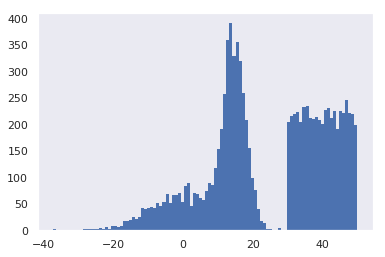

In [56]:
def custom_sampling_method():
    a = np.random.random()
    
    if a < 0.2:
        return np.random.normal(1, 10)
    elif a > 0.7:
        return np.random.normal(15, 3)
    else:
        return np.random.uniform(30, 50)

print_distribution(custom_sampling_method)

# Perform the sum of multiple samples from this custom distribution

In [57]:
def compute_sum_from_same_sampling_method(method, N=1000):
    return np.sum([method() for i in range(N)])
    
    
compute_sum_from_same_sampling_method(custom_sampling_method)

24232.19216184898

Mean: 24703.214482885975
Standard Deviation: 536.7912567754198
A look at the distribution


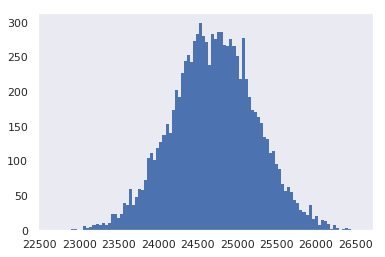

In [58]:
print_distribution(lambda : compute_sum_from_same_sampling_method(custom_sampling_method))

We can see here that despite the weird looking distribution we designed, the sum of multiple samples from it is normally distributed, and that would have been the same for any input distribution !

One thing to note is that if the sum is normally distributed, the mean will be as well. It's more interesting to play with the mean to look at how the normal evolves with the number of samples we take.

# What about the mean distribution ?

In [59]:
def compute_mean_from_same_sampling_method(method, N=1000):
    return np.mean([method() for i in range(N)])
    
    
compute_mean_from_same_sampling_method(custom_sampling_method)

24.018776959017668

Mean: 24.696834835331416
Standard Deviation: 0.5455730164351356
A look at the distribution


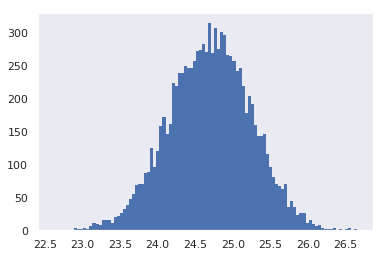

In [60]:
print_distribution(lambda : compute_mean_from_same_sampling_method(custom_sampling_method))

As we expected it's a normal as well.

Interesting thing we can note here is that the mean of this new distribution is the same that the custom distribution we designed !

# How does the number of samples change the distribution ?

We of course expect that as the number of samples goes up, the final mean distribution will be "less spread", or "more precise" around its mean. 

*But how much ?*

## With 100 samples

Mean: 24.681991669844923
Standard Deviation: 1.7232647632660922
A look at the distribution


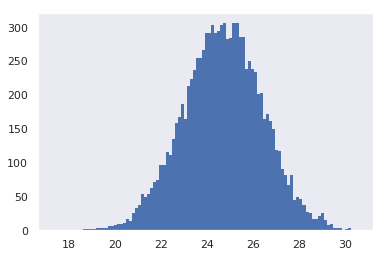

In [61]:
print_distribution(lambda : compute_mean_from_same_sampling_method(custom_sampling_method, N=100))

## With 1000 samples

Mean: 24.693500743779644
Standard Deviation: 0.54055615981133
A look at the distribution


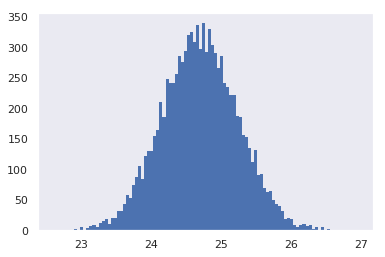

In [62]:
print_distribution(lambda : compute_mean_from_same_sampling_method(custom_sampling_method, N=1000))

## With 10000 samples

Mean: 24.699088086709615
Standard Deviation: 0.17251842331142977
A look at the distribution


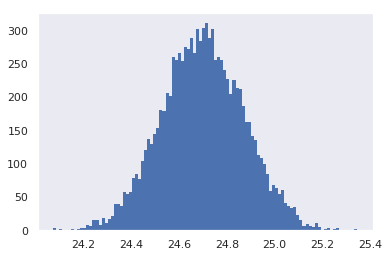

In [63]:
print_distribution(lambda : compute_mean_from_same_sampling_method(custom_sampling_method, N=10000))

We can see here that as the number of samples goes up the mean distribution gets tighter to the mean of our custom distribution.
As the number of samples is multiplied by 10, the standard deviation is divided by ...~3.16 = Square root of 10 !

This is expected, the Central Limit Theorem states that the mean distribution follows a normal distribution with parameters mean = (mean of the custom input distribution), and variance = (variance of the custom input distribution divided by the number of samples) !

# Why is this nice

The normal distribution is a distribution that is very handy to manipulate and that has been studied a lot. 

When performing A/B testing or other kind of statistical analysis we often have to estimate sum or mean of a sample !
Knowing that whatever the input distribution is, these estimates will revolve in a normal distribution is a silver bullet in analysis, it will enable to estimate probabilities easily.

## Appendix: Careful, this doesn't work with the median

In [65]:
def compute_median_from_same_sampling_method(method, N=1000):
    return np.median([method() for i in range(N)])
    
    
compute_median_from_same_sampling_method(custom_sampling_method)

30.53999166748583

Mean: 26.098338008599047
Standard Deviation: 4.700948068394575
A look at the distribution


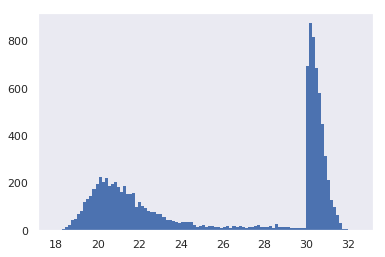

In [66]:
print_distribution(lambda : compute_median_from_same_sampling_method(custom_sampling_method, N=1000))

The median is not normally distributed at all, hence it's a difficult tool to work with